# Spam Detection using Python
Download the dataset from this [url](https://archive.ics.uci.edu/ml/datasets/Spambase)

## Spam Detection using Naive Bayes

In [1]:
from sklearn.naive_bayes import MultinomialNB
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('./tmp/dataset/spambase.data').values
# Shuffle each row in-place, but preserve the row
np.random.shuffle(data)

In [3]:
# Features
X = data[:, : 48] 
# Target
Y = data[:,-1]

In [4]:
# Train and test split
X_train = X[:-100,]
Y_train = Y[:-100,]
X_test = X[-100:,]
Y_test = Y[-100:,]

In [5]:
model = MultinomialNB()
model.fit(X_train, Y_train)
print("Classification score for NB: ", model.score(X_test, Y_test))

Classification score for NB:  0.88


## Spam Detection using AdaBoost

In [6]:
from sklearn.ensemble import AdaBoostClassifier

model = AdaBoostClassifier()
model.fit(X_train, Y_train)
print("Classification score for AdaBoost: ", model.score(X_test, Y_test))

Classification score for AdaBoost:  0.97


## Spam Detection using TF-IDF and Counter
Download the data from this [url](https://www.kaggle.com/uciml/sms-spam-collection-dataset)

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from wordcloud import WordCloud

In [8]:
df = pd.read_csv('./tmp/dataset/spam.csv', encoding='ISO-8859-1')

In [9]:
print(df.head())

     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  


In [10]:
# Drop unnecessary columns
df = df.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)

In [11]:
# Rename columns to something better
df.columns = ["labels", 'data']

In [12]:
# Create binary labels
df['b_labels'] = df['labels'].map({'ham': 0, 'spam': 1})
Y = df['b_labels'].values

In [13]:
# Split up the data
df_train, df_test, Y_train, Y_test = train_test_split(df['data'], Y, test_size=0.33)

### IF-IDF

In [14]:
# Try  multiple ways of calculating features
tfidf = TfidfVectorizer(decode_error='ignore')
X_train_TF_IDF = tfidf.fit_transform(df_train)
X_test_TF_IDF = tfidf.transform(df_test)

### Raw Counter

In [15]:
count_vectorizer = CountVectorizer(decode_error='ignore')
X_train_raw_counter = count_vectorizer.fit_transform(df_train)
X_test_raw_counter = count_vectorizer.transform(df_test)

In [16]:
X_train = X_train_raw_counter
X_test = X_test_raw_counter

In [17]:
# Create the model, train it, print scores
model = MultinomialNB()
model.fit(X_train, Y_train)
print("Train score: ", model.score(X_train, Y_train))
print("Test score: ", model.score(X_test, Y_test))

Train score:  0.993570854540584
Test score:  0.9885807504078303


In [18]:
# Visualize the data
def visualize(label):
    words = ''
    for msg in df[df['labels'] == label]['data']:
        msg = msg.lower()
        words += msg + ''
    wordcloud = WordCloud(width=600, height=400).generate(words)
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

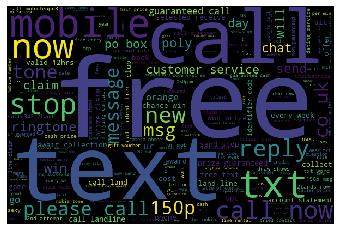

In [19]:
visualize('spam')

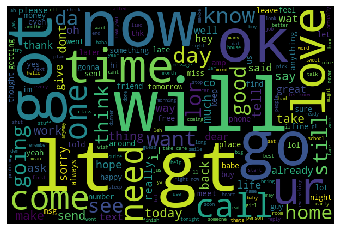

In [20]:
visualize('ham')

In [21]:
# see what we're getting wrong
df['predictions'] = model.predict(tfidf.transform(df['data']))

In [22]:
# things that should be spam
sneaky_spam = df[(df['predictions'] == 0) & (df['b_labels'] == 1)]['data']
for msg in sneaky_spam[:20]:
    print(msg)

Did you hear about the new \Divorce Barbie\"? It comes with all of Ken's stuff!"
<Forwarded from 448712404000>Please CALL 08712404000 immediately as there is an urgent message waiting for you.
Email AlertFrom: Jeri StewartSize: 2KBSubject: Low-cost prescripiton drvgsTo listen to email call 123
Do you realize that in about 40 years, we'll have thousands of old ladies running around with tattoos?
Hello. We need some posh birds and chaps to user trial prods for champneys. Can i put you down? I need your address and dob asap. Ta r
Please CALL 08712402779 immediately as there is an urgent message waiting for you
Can U get 2 phone NOW? I wanna chat 2 set up meet Call me NOW on 09096102316 U can cum here 2moro Luv JANE xx Callså£1/minmoremobsEMSPOBox45PO139WA
Win the newest ÛÏHarry Potter and the Order of the Phoenix (Book 5) reply HARRY, answer 5 questions - chance to be the first among readers!
Thanks for the Vote. Now sing along with the stars with Karaoke on your mobile. For a FREE link 

In [23]:
# things that should not be spam
not_actually_spam = df[(df['predictions'] == 1) & (df['b_labels'] == 0)]['data']
for msg in not_actually_spam[:20]:
    print(msg)

Anytime...
Nokia phone is lovly..
